<a href="https://www.kaggle.com/code/hashemili/loan-prediction-ili?scriptVersionId=226310886" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Loan Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/loan-prediction/Loan Prediction.csv')

## Explor Our Data

In [3]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [6]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

## Transform Opject Data

In [7]:
df['Married/Single'] = df['Married/Single'].map({'single': 0, 'married': 1})
df['House_Ownership'] = df['House_Ownership'].map({'rented': 0, 'owned': 1})
df['Car_Ownership'] = df['Car_Ownership'].map({'no': 0, 'yes': 1})

In [8]:
df.dropna(inplace=True)

In [9]:
df['House_Ownership'] = df['House_Ownership'].astype('int64')

In [10]:
label_encoders = {}
for col in ['Profession', 'CITY']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:
df.drop(columns=['Id'], inplace=True)

In [12]:
df.drop(columns=['STATE'], inplace=True)

In [13]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,0,0,0,33,251,3,13,0
1,7574516,40,10,0,0,0,43,227,9,13,0
2,3991815,66,4,1,0,0,47,8,4,10,0
3,6256451,41,2,0,0,1,43,54,2,12,1
4,5768871,47,11,0,0,0,11,296,3,14,1


## Data Analysis

**Find the unique values in each column.**

In [14]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Income: 40682
Age: 59
Experience: 21
Married/Single: 2
House_Ownership: 2
Car_Ownership: 2
Profession: 51
CITY: 317
CURRENT_JOB_YRS: 15
CURRENT_HOUSE_YRS: 5
Risk_Flag: 2


**Data distribution analysis**

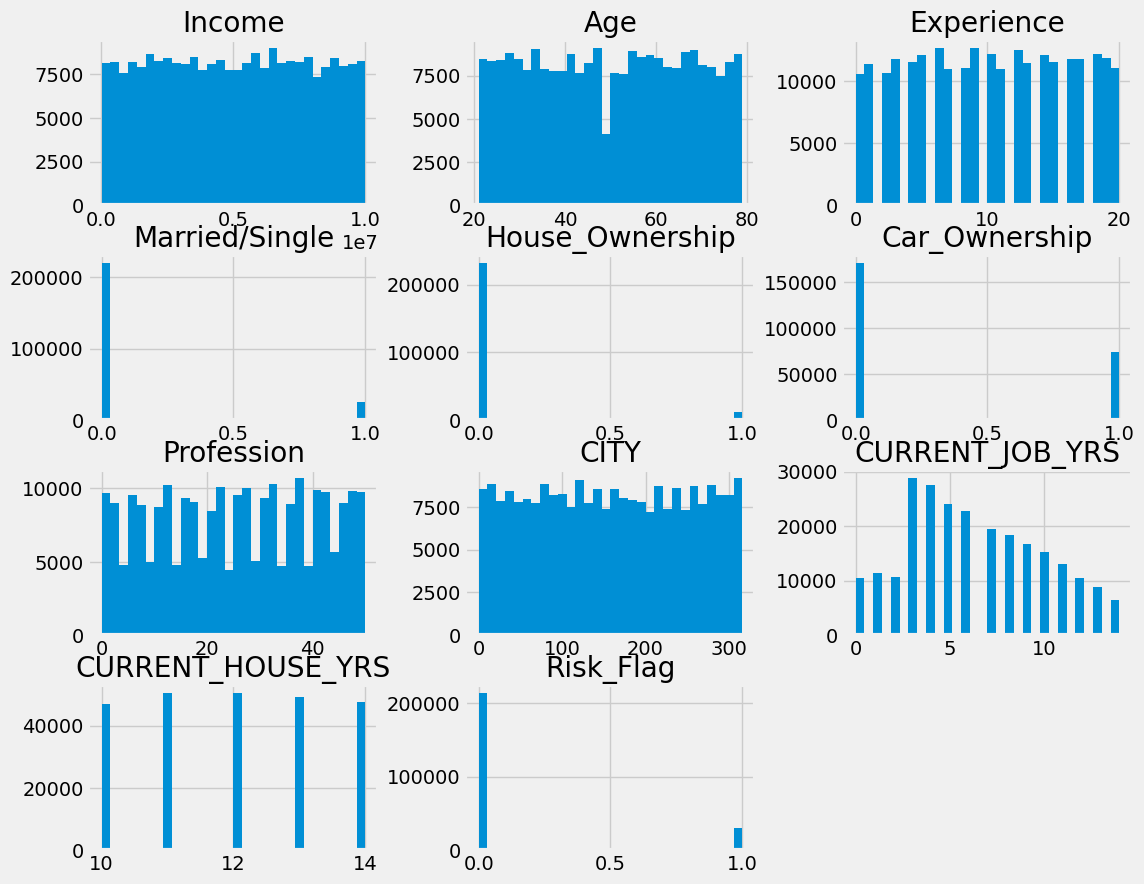

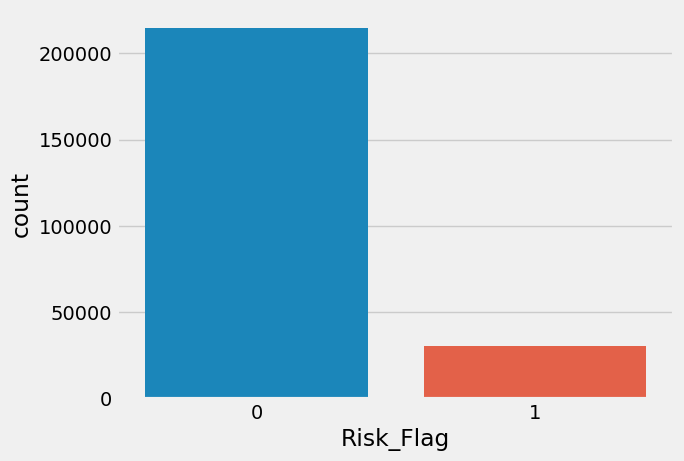

In [15]:
df.hist(figsize=(12, 10), bins=30)
plt.show()

sns.countplot(x=df['Risk_Flag'])
plt.show()

**Analyze the relationship between variables**

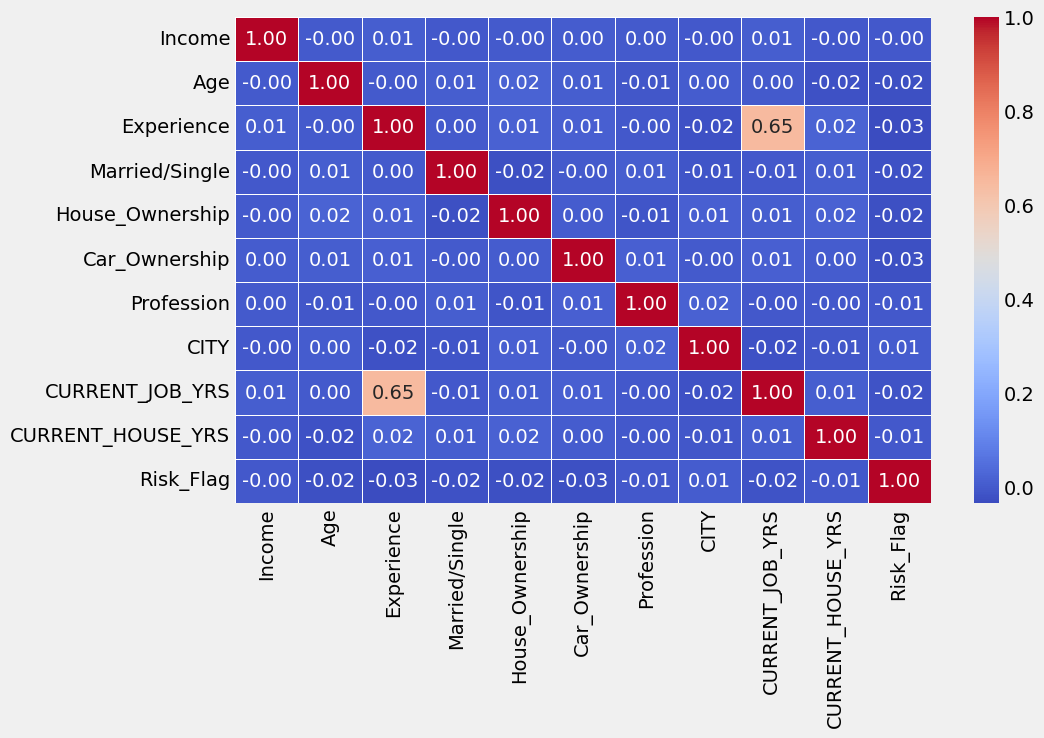

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.6)
plt.show()

****

## Create Our Models

In [17]:
x= df.drop('Risk_Flag', axis=1)
y= df['Risk_Flag']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [19]:
model1= LogisticRegression()
model2= SVC()
model3= RandomForestClassifier()
model4= GradientBoostingClassifier(n_estimators=1000)

In [20]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result=[]

LogisticRegression()
accuracy is : 0.8795033085532228


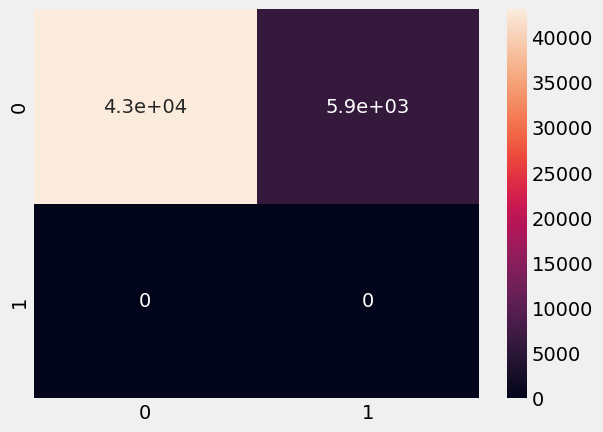

In [21]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    
    result.append(accuracy)
    
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy is :',accuracy)
cal(model1)

SVC()
accuracy is : 0.8795033085532228


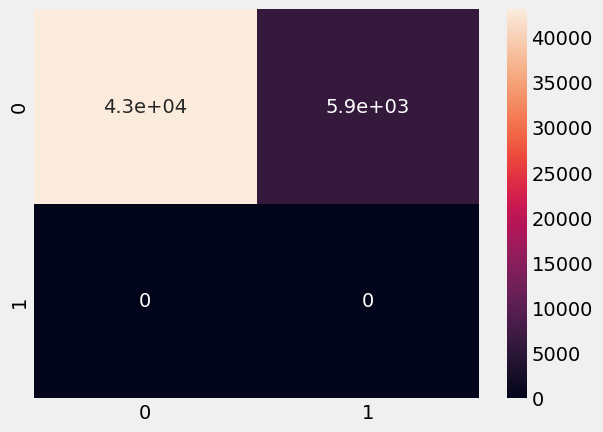

In [22]:
cal(model2)

RandomForestClassifier()
accuracy is : 0.9008659423249734


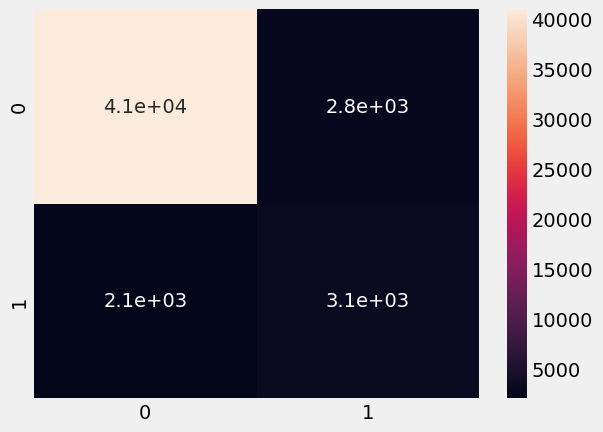

In [23]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is : 0.8828118617759987


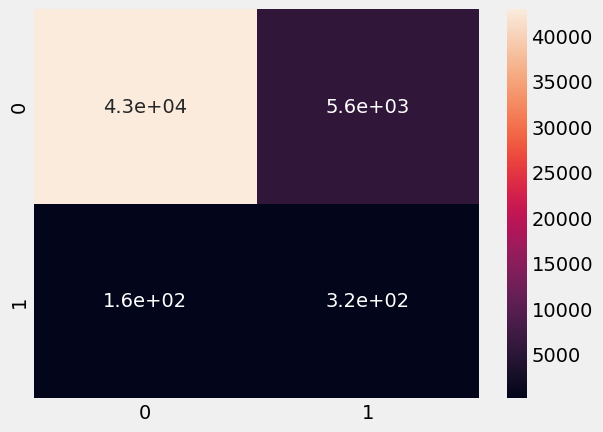

In [24]:
cal(model4)

In [25]:
result

[0.8795033085532228,
 0.8795033085532228,
 0.9008659423249734,
 0.8828118617759987]

In [26]:
min_length = min(len(columns), len(result))

columns = columns[:min_length]
result = result[:min_length]

In [27]:
FinalResult= pd.DataFrame({'Algorithm':columns,'Accuracies':result,})
FinalResult

,Algorithm,Accuracies
0,LogisticRegression,0.879503
1,SVC,0.879503
2,RandomForestClassifier,0.900866
3,GradientBoostingClassifier,0.882812


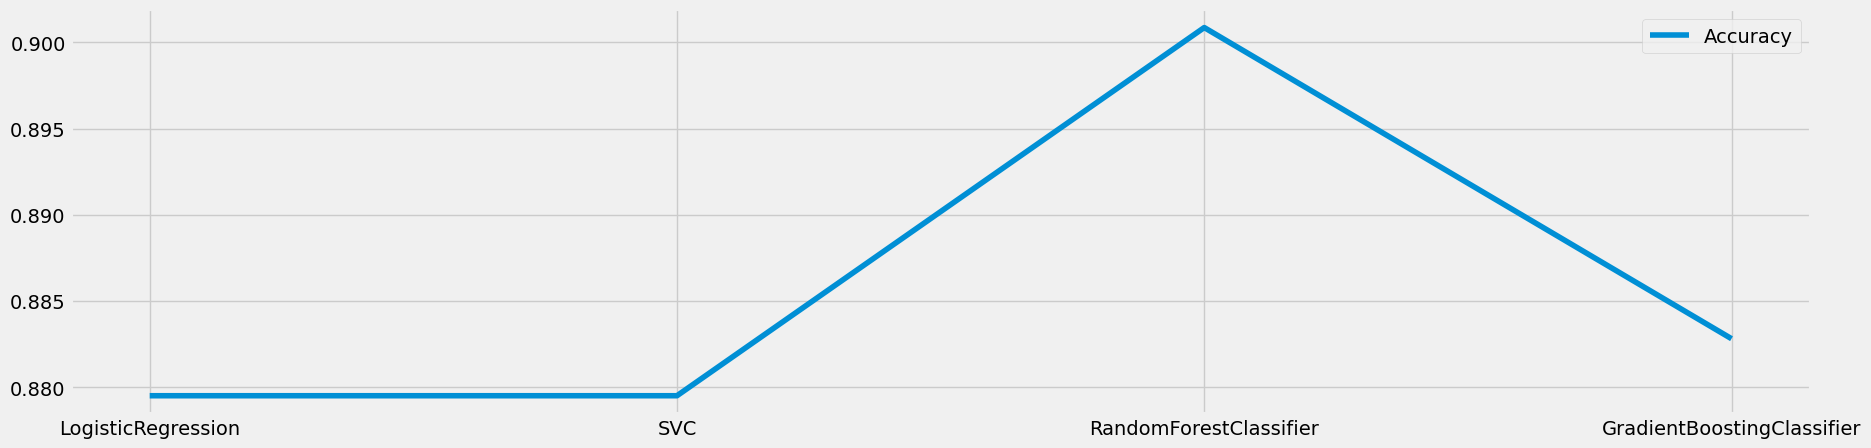

In [28]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algorithm,result,label='Accuracy')
plt.legend()
plt.show()

# Thank You!